/tmp/ipython-input-687327668.py:111: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame = imageio.imread(buf)


¡Animación exportada como 'animated_transform.gif'!


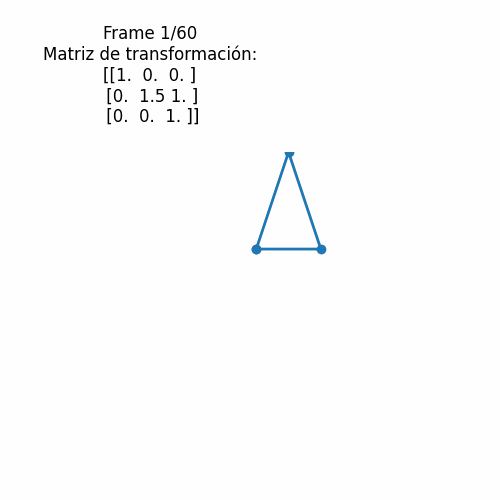

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import io

# Número de frames que tendrá la animación
n_frames = 60

# Definición del triángulo (figura inicial) usando coordenadas 2D
triangle = np.array([
    [0, 0],      # Punto 1
    [1, 0],      # Punto 2
    [0.5, 1],    # Punto 3
    [0, 0]       # Para cerrar el triángulo
])

# Función para crear la matriz de traslación
def get_translation_matrix(tx, ty):
    """
    Devuelve la matriz de traslación 3x3 para mover puntos tx unidades en X y ty en Y.
    """
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

# Función para crear la matriz de rotación
def get_rotation_matrix(theta):
    """
    Devuelve la matriz de rotación 3x3 para rotar theta radianes.
    """
    c, s = np.cos(theta), np.sin(theta)
    return np.array([
        [c, -s, 0],
        [s,  c, 0],
        [0,  0, 1]
    ])

# Función para crear la matriz de escala
def get_scale_matrix(sx, sy):
    """
    Devuelve la matriz de escala 3x3 para escalar sx veces en X y sy veces en Y.
    """
    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0,  0, 1]
    ])

# Función para aplicar la matriz de transformación a los puntos
def apply_transform(points, M):
    """
    Aplica la matriz M (3x3) a los puntos 2D dados.
    Convierte los puntos a coordenadas homogéneas, realiza la multiplicación y retorna los puntos transformados.
    """
    ones = np.ones((points.shape[0], 1))           # Agrega columna de unos para homogéneos
    pts_hom = np.hstack([points, ones])            # Convierte a 3D homogéneo
    pts_trans = (M @ pts_hom.T).T                  # Aplica transformación
    return pts_trans[:, :2]                        # Retorna coordenadas 2D

# Lista para almacenar los frames de la animación
frames = []

# Bucle principal para generar cada frame de la animación
for i in range(n_frames):
    # Normaliza el tiempo t entre 0 y 1
    t = i / (n_frames - 1)

    # Calcula los parámetros de transformación que varían con el tiempo
    tx = 2 * np.sin(2 * np.pi * t)          # Traslación en X
    ty = 1 * np.cos(2 * np.pi * t)          # Traslación en Y
    theta = 2 * np.pi * t                   # Rotación en radianes (0 a 360 grados)
    sx = 1 + 0.5 * np.sin(2 * np.pi * t)    # Escala en X
    sy = 1 + 0.5 * np.cos(2 * np.pi * t)    # Escala en Y

    # Construye las matrices de transformación
    T = get_translation_matrix(tx, ty)
    R = get_rotation_matrix(theta)
    S = get_scale_matrix(sx, sy)

    # Matriz total: primero escala, luego rota, luego traslada
    M = T @ R @ S

    # Aplica la transformación al triángulo
    triangle_t = apply_transform(triangle, M)

    # Crea la figura y ajusta la posición del área de gráfico para dejar espacio arriba
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.subplots_adjust(top=0.7)  # Ajusta el margen superior para el texto

    # Dibuja el triángulo transformado
    ax.plot(triangle_t[:, 0], triangle_t[:, 1], 'o-', lw=2)
    ax.set_xlim(-3, 3)             # Limites ejes X
    ax.set_ylim(-2, 2.5)           # Limites ejes Y
    ax.set_aspect('equal')         # Mantiene proporciones
    ax.axis('off')                 # Oculta ejes

    # Escribe la matriz de transformación arriba a la izquierda, fuera del área del triángulo
    fig.text(
        0.3, 0.95,
        f'Frame {i+1}/{n_frames}\nMatriz de transformación:\n{np.round(M, 2)}',
        ha='center', va='top', fontsize=12,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
    )

    # Guarda el frame en un buffer de memoria y lo lee como imagen
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    frame = imageio.imread(buf)
    frames.append(frame)
    plt.close(fig)
    buf.close()

# Exporta todos los frames como un GIF animado
imageio.mimsave('animated_transform.gif', frames, duration=0.05)
print("¡Animación exportada como 'animated_transform.gif'!")

# Muestra el GIF directamente en Jupyter o Colab
from IPython.display import Image
Image(filename='animated_transform.gif')